<a href="https://colab.research.google.com/github/Maulanip/Pemerograman-Dasar/blob/main/tugas_rumah_(Per_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# 1. Import library Pandas
import pandas as pd

# 2. Tentukan jalur (path) file
file_path = '/content/drive/My Drive/customers (2).csv'

# 3. Baca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# 4. Tampilkan 5 baris pertama untuk verifikasi
print(df.head())

   customer_id customer_name             gender  age  \
0            1       fulan 1             Female   30   
1            2       fulan 2  Prefer not to say   69   
2            3       fulan 3  Prefer not to say   59   
3            4       fulan 4  Prefer not to say   67   
4            5       fulan 5  Prefer not to say   30   

                     home_address  zip_code               city  \
0  8606 Victoria TerraceSuite 560      5464      Johnstonhaven   
1      8327 Kirlin SummitApt. 461      8223    New Zacharyfort   
2       269 Gemma SummitSuite 109      5661           Aliburgh   
3       743 Bailey GroveSuite 141      1729  South Justinhaven   
4         48 Hyatt ManorSuite 375      4032     Griffithsshire   

                          state    country  
0            Northern Territory  Australia  
1               South Australia  Australia  
2  Australian Capital Territory  Australia  
3                    Queensland  Australia  
4                    Queensland  Australi

In [7]:
df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


In [10]:
# Ringkasan statistik
df.describe()

# Rata-rata age
rata_rata_age = df['age'].mean()
print("Rata-rata age:", rata_rata_age)

# Modus jumlah gender
modus_state = df['state'].mode()
print("Modus state:", modus_state)

Rata-rata age: 50.92949354518371
Modus state: 0    South Australia
Name: state, dtype: object


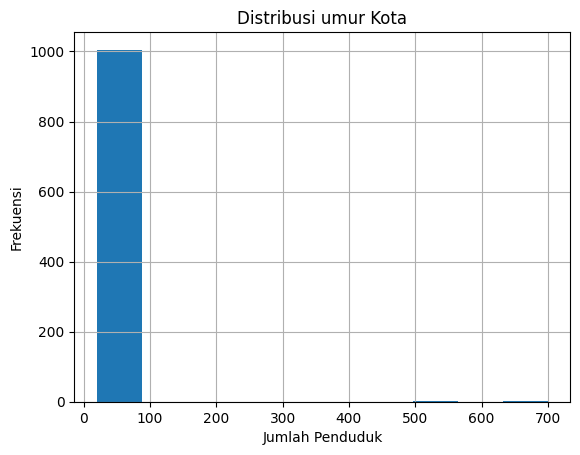

In [16]:
import matplotlib.pyplot as plt

df['age'].hist()
plt.title("Distribusi umur Kota")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Frekuensi")
plt.show()

In [17]:
# Korelasi dan Kovarian hanya dapat dihitung untuk kolom numerik.
# Kolom 'gender' berisi string, sehingga harus dikeluarkan dari perhitungan ini.

# Memilih hanya kolom numerik dari DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Korelasi untuk kolom numerik
print("Korelasi untuk kolom numerik:")
corr_matrix = df_numeric.corr()
print(corr_matrix)

# Kovarian untuk kolom numerik
print("\nKovarian untuk kolom numerik:")
cov_matrix = df_numeric.cov()
print(cov_matrix)

Korelasi untuk kolom numerik:
             customer_id       age  zip_code
customer_id     1.000000  0.009019 -0.007064
age             0.009019  1.000000  0.009357
zip_code       -0.007064  0.009357  1.000000

Kovarian untuk kolom numerik:
              customer_id         age      zip_code
customer_id  83332.238470   79.450905 -5.884992e+03
age             79.450905  931.244527  8.240489e+02
zip_code     -5884.992034  824.048921  8.328050e+06


In [20]:
# Menambah kolom kategori (menggunakan 'age' karena 'state' adalah string)
# Asumsi: Anda ingin mengkategorikan berdasarkan umur.
df['Kategori_umur'] = df['age'].apply(lambda x: 'Tua' if x >= 60 else 'Muda')
print("DataFrame dengan kolom 'Kategori_umur' baru:")
print(df.head())

# Rata-rata umur per kategori 'Kategori_umur'
print("\nRata-rata umur per kategori 'Kategori_umur':")
group_mean = df.groupby('Kategori_umur')['age'].mean()
print(group_mean)

# Agregasi lengkap berdasarkan 'Kategori_umur'
print("\nAgregasi lengkap berdasarkan 'Kategori_umur':")
group_agg = df.groupby('Kategori_umur').agg({
    'age': ['mean', 'max'],
    'customer_id': ['count'] # Menggunakan 'customer_id' dengan 'count' karena 'state' bukan numerik
})
print(group_agg)

DataFrame dengan kolom 'Kategori_umur' baru:
   customer_id customer_name             gender  age  \
0            1       fulan 1             Female   30   
1            2       fulan 2  Prefer not to say   69   
2            3       fulan 3  Prefer not to say   59   
3            4       fulan 4  Prefer not to say   67   
4            5       fulan 5  Prefer not to say   30   

                     home_address  zip_code               city  \
0  8606 Victoria TerraceSuite 560      5464      Johnstonhaven   
1      8327 Kirlin SummitApt. 461      8223    New Zacharyfort   
2       269 Gemma SummitSuite 109      5661           Aliburgh   
3       743 Bailey GroveSuite 141      1729  South Justinhaven   
4         48 Hyatt ManorSuite 375      4032     Griffithsshire   

                          state    country Kategori_umur  
0            Northern Territory  Australia          Muda  
1               South Australia  Australia           Tua  
2  Australian Capital Territory  Australia  